In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
happiness = pd.read_csv('HappinessAlcoholConsumption.csv')
happiness.head(5)

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [20]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           122 non-null    object 
 1   Region            122 non-null    object 
 2   Hemisphere        122 non-null    object 
 3   HappinessScore    122 non-null    float64
 4   HDI               122 non-null    int64  
 5   GDP_PerCapita     122 non-null    float64
 6   Beer_PerCapita    122 non-null    int64  
 7   Spirit_PerCapita  122 non-null    int64  
 8   Wine_PerCapita    122 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 8.7+ KB


In [29]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [ ]:
#боксплот - уровень счастья в разных странах
#тепловая карта по странам и потреблению алкоголя
#скэттер есть ли зависимость уровня счастья и ввп в стране
#скэттер есть ли зависимость употребления крепкого алкоголя и ввп в странах
#скэттер есть ли зависимость употребления крепкого алкоголя и уровня счастья в странах

Text(0.5, 1.0, 'Сравнение частоты потребления различных алкогольных напитков по всему миру')

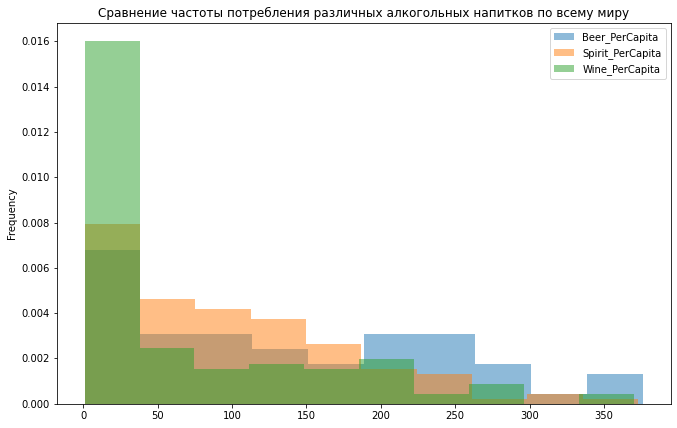

In [30]:
#гистограмма - сравнить как часто употребляют пиво/вино/крепкий алкоголь (отдельно) во всех странах
happiness['Beer_PerCapita'].plot(kind='hist', alpha = 0.5, bins = 10, density = True)
happiness['Spirit_PerCapita'].plot(kind='hist', alpha = 0.5, bins = 10, density = True)
happiness['Wine_PerCapita'].plot(kind='hist', alpha = 0.5, bins = 10, density = True)
plt.legend(loc = 'upper right')
plt.title ('Сравнение частоты потребления различных алкогольных напитков по всему миру')

Вывод: В большинстве анализируемых стран население потребляет любой тип алкоголь менее чем 50 литров на душу населения. Реже всего (или совсем в малых количествах)потребляется вино. Пиво употребляется в больших объемах чаще других алкогольных напитков.

In [44]:
#сгруппируем данные по регионам (найдем среднее потребление по каждому из 3х напитков)
alc_by_regions = happiness[['Region','Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']].groupby('Region').mean()
alc_by_regions

,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
Region,,,
Australia and New Zealand,232.000000,75.500000,193.500000
Central and Eastern Europe,170.074074,171.777778,83.814815
Eastern Asia,93.250000,149.750000,10.250000
Latin America and Caribbean,159.478261,109.913043,35.782609
Middle East and Northern Africa,24.818182,41.363636,10.363636
North America,244.500000,140.000000,92.000000
Southeastern Asia,79.600000,104.600000,3.000000
Sub-Saharan Africa,78.464286,20.750000,12.214286
Western Europe,216.450000,101.500000,197.800000


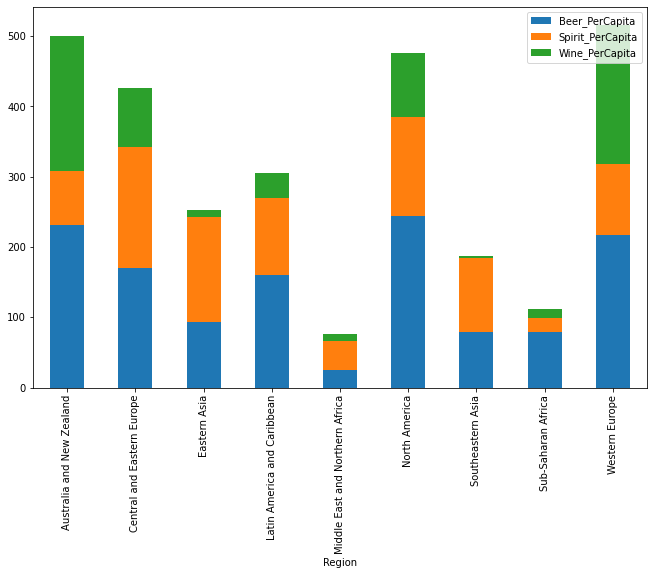

In [45]:
#столбчатая диаграмма употребление разных видов алкоголя в среднем по регионам
alc_by_regions.plot(kind='bar',stacked=True)

Больше всего алкоголя на душу населения потребляется в Западной Европе, Австралии и Северной Америке, причем
пиво является наиболее популярным напитком. Однако,в  центральной и Восточной Европе и Восточной Азии выпивают больше крепкого
алкоголя, чем где-либо. Практически не потребляется алкоголь в странах Ближнего Востока и Северной Африке.

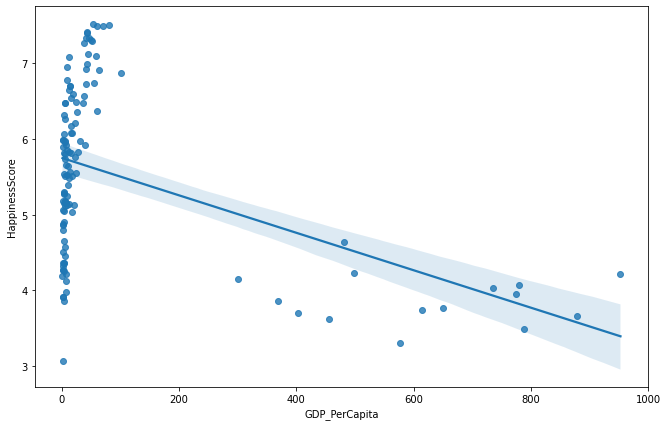

In [58]:
#есть ли зависимость уровня счастья и ввп в стране
sns.regplot(data=happiness, x = 'GDP_PerCapita', y = 'HappinessScore')

Нам сложно проследить наличие корреляции на графике выше из-за наличия выбросов по показателям ВВП. Проанализировав выбросы, можно увидеть что скорее всего в данных имеютс яошибки, так как Африканские страны не могут иметь самый высокий уровень ВВП в мире. Однако, мы можем лимитировать ось Х чтобы понять есть ли корреляция.

(0.0, 100.0)

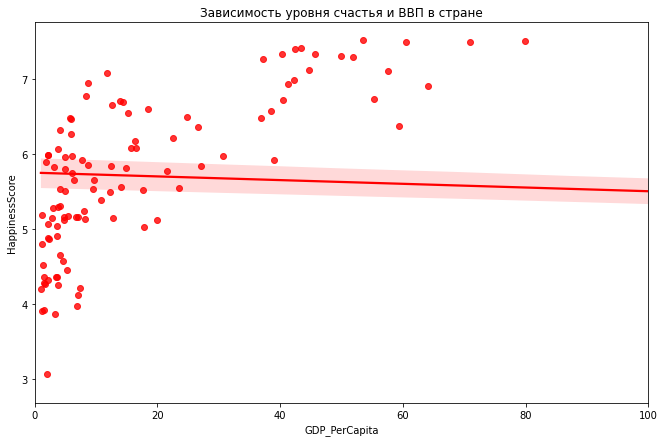

In [61]:
sns.regplot(data=happiness, x = 'GDP_PerCapita', y = 'HappinessScore', color = 'red')
plt.title('Зависимость уровня счастья и ВВП в стране')
plt.xlim(0,100)

Просматривается прямая корреляция - мы не видим стран, в которых при высоком ВВП уровень счастья был бы низок. 
При этом, наличие точек в вернем левом углу говорит о том, что есть страны, в котором при низком ВВП уровень
счастья все равно высок.

Text(0.5, 1.0, 'Зависимость уровня счастья и потребления алкоголя в стране')

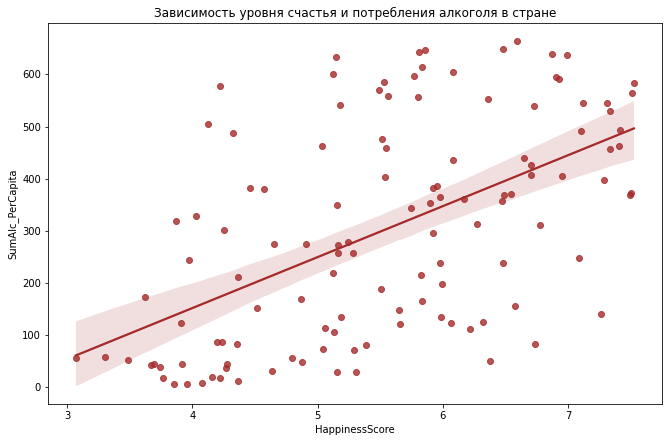

In [88]:
#есть ли зависимость  в стране и употребления крепкого алкоголя
happiness['SumAlc_PerCapita'] = happiness['Beer_PerCapita']+happiness['Spirit_PerCapita']+happiness['Wine_PerCapita']
sns.regplot(data=happiness, x = 'HappinessScore', y = 'SumAlc_PerCapita', color = 'brown')
plt.title('Зависимость уровня счастья и потребления алкоголя в стране')

Значения распределены по всем областям графика, однако, мы можем заметить, что страны, в которых уровень потребления
алкоголя мал, уровень счастья более низок. Нельзя делать однозначные выводы о такой наличии зависимости, так как
имеются и немало исключений из этой гипотезы. Возможно, следует исследовать каждый регион в отдельности.

In [73]:
#Посмотрим в отдельности на регион, где потребляется больше всего алкоголя в среднем:
western_europe = happiness[happiness['Region']=='Western Europe']
western_europe

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,SumAlc_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,583
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,565
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,372
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,369
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,493
6,Netherlands,Western Europe,north,7.339,928,45.638,251,88,190,529
9,Sweden,Western Europe,north,7.291,932,51.845,152,60,186,398
11,Austria,Western Europe,north,7.119,906,44.731,279,75,191,545
14,Germany,Western Europe,north,6.994,934,42.233,346,117,175,638
16,Belgium,Western Europe,north,6.929,915,41.261,295,84,212,591


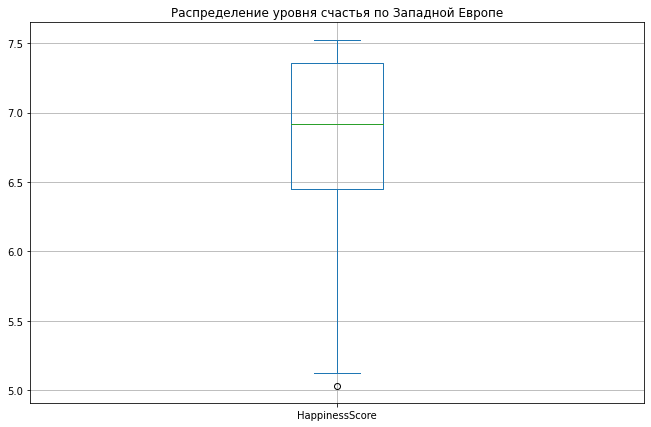

In [86]:
#Построим боксплот, показывающий распределение счастья по Западной Европе
western_europe['HappinessScore'].plot(kind='box', title = 'Распределение уровня счастья по Западной Европе', grid = True)

Медиана близка к 7, третий квартиль находится выше 7,5. Есть один недалекий выброс, который находится недалеко от нижнего квартиля. В целом, во всех странах Западной Европы показатели уровня счастья выше среднего.

In [81]:
western_europe_consump = western_europe[['Country','Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']].groupby('Country').mean()

Text(0.5, 1.0, 'Сравнение потребления алкоголя в разных странах Западной Европы')

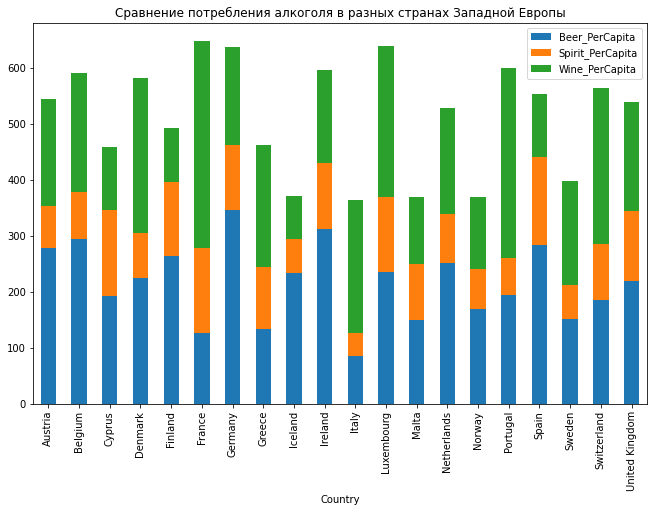

In [87]:
western_europe_consump.plot(kind='bar',stacked=True)
plt.title('Сравнение потребления алкоголя в разных странах Западной Европы')

Мы видим из графика, что Франция, Люксенбург и Германия являются странами, употребляющими наибольшее количество алкоголя. Страны, где употребляется меньше всего алкоголя - это Италия, Исландия, Мальта и Норвегия.